In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import itertools
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import string

df = pd.read_csv("datawithsentiments.csv", encoding='utf-8')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [290]:
def clean(text):
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    text = re.sub(r'[^A-Za-z\s]',r'',text)
    text = re.sub(r'\n',r'',text)
    text = re.sub('This comment may be offensive', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    stop_words = stopwords.words('english')
    token_list = []
    for word in tokens:
        if not word in stop_words:
            token_list.append(word)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token, pos="v") for token in tokens]
    s = ' '.join([str(elem) for elem in tokens]) 
    return s

In [291]:
df['clean_comment'] = df['Text'].apply(lambda x: clean(x))
l = stopwords.words('english')

In [292]:
person = 'edwina'
cv = CountVectorizer(stop_words=l)
df_word_freq = cv.fit_transform(df.clean_comment)
top_words = pd.DataFrame(df_word_freq.toarray(), columns=cv.get_feature_names())
top_words = top_words[top_words[person] == 1]
top_words = pd.DataFrame((top_words.sum()).sort_values(ascending = False)).reset_index()
top_words = top_words.rename(columns = {'index': 'word', 0:'frequency'})
top_words = top_words[top_words.frequency > 0]
#frequency of words in data
for i in range(len(top_words)):
    print(top_words.loc[i].word, top_words.loc[i].frequency)

edwina 731
tristan 128
like 116
im 98
love 97
get 77
go 71
know 63
think 61
dont 56
kill 49
want 47
queen 46
make 43
really 42
say 42
cant 41
book 41
would 41
much 41
die 40
oh 39
feel 38
read 37
see 36
please 34
shes 33
one 33
could 32
back 31
right 31
fuck 30
let 30
even 30
end 29
time 29
wait 29
eric 27
gods 25
something 25
didnt 25
happen 25
chapter 24
thats 24
na 24
tell 23
deserve 23
baby 23
take 23
drusilla 23
way 22
youre 22
give 21
cry 21
character 21
god 21
find 21
everyone 19
yes 19
woman 19
heart 19
come 19
gon 19
better 19
start 18
life 18
hope 18
still 18
everything 17
live 17
fight 17
well 17
maybe 17
story 17
dead 17
wont 16
tremayne 16
hes 16
man 16
thing 16
doesnt 16
remember 16
poor 15
win 15
name 15
people 15
bitch 15
word 15
also 15
someone 15
believe 15
write 15
happy 15
never 15
mean 15
okay 15
thank 14
death 14
break 14
look 14
world 14
good 14
bad 13
need 13
first 13
might 13
already 13
ass 13
try 13
damn 13
ill 13
family 12
honestly 12
shit 12
beautiful 12
sis

levanes 1
amazingg 1
hungry 1
refresh 1
autocorrect 1
refrain 1
phoenix 1
attach 1
vain 1
level 1
dracneese 1
alter 1
alsothe 1
alsoo 1
badly 1
badwhat 1
unforgiving 1
unfortunately 1
virago 1
dress 1
violently 1
lmfao 1
express 1
justalines 1
qnd 1
recommendation 1
alot 1
hmmthe 1
whyysnrjsjj 1
unfinished 1
remorse 1
perk 1
virtually 1
reply 1
underestimate 1
escape 1
underneath 1
wierdts 1
doe 1
understatement 1
location 1
humor 1
amen 1
repeat 1
undo 1
hehe 1
leisurely 1
rematch 1
amd 1
dosent 1
whooptakajjwnlkxosskksdnekyassaass 1
babe 1
livestock 1
doom 1
whore 1
view 1
unsheath 1
whoop 1
hurry 1
experience 1
ayy 1
physical 1
herd 1
literelly 1
herdeath 1
asteria 1
hells 1
universe 1
backand 1
vincent 1
remain 1
justify 1
explode 1
helland 1
donkeys 1
unlike 1
babybut 1
assign 1
lengthy 1
assistants 1
physicallyemotionally 1
assume 1
hello 1
fairer 1
hath 1
pun 1
angry 1
kingdoms 1
tomorrow 1
diee 1
mask 1
dynamic 1
tomato 1
everly 1
weave 1
web 1
dieand 1
ignore 1
anyways 1
fanta

In [374]:
def get_sentiment_scores(person):
    cv = CountVectorizer(stop_words=l)
    df_word_freq = cv.fit_transform(df.clean_comment)
    top_words = pd.DataFrame(df_word_freq.toarray(), columns=cv.get_feature_names())
    top_words['Negative'] = df['Negative']
    top_words['Neutral'] = df['Neutral']
    top_words['Positive'] = df['Positive']
    top_words['Compound'] = df['Compound']
    top_words = top_words[top_words[person] == 1]
    total_occurances_of_word = len(top_words)
    average_positive = len(top_words[top_words.Compound > 0])
    average_neutral = len(top_words[(top_words.Compound <= 0) & (top_words.Compound >= -0.2)])
    average_negative = len(top_words[top_words.Compound < -0.2])
    top_words = pd.DataFrame((top_words.sum()).sort_values(ascending = False)).reset_index()
    top_words = top_words.rename(columns = {'index': 'word', 0:'frequency'})
    top_words = top_words[top_words.frequency > 0]
    return total_occurances_of_word, average_positive, average_neutral, average_negative

In [378]:
def plot_scores(characters):
    r = list(np.arange(len(characters)))
    positive_mentions = []
    neutral_mentions = []
    negative_mentions = []
    for character in characters:
        tot, pos, neu, neg = get_sentiment_scores(character)
        positive_mentions.append(pos)
        neutral_mentions.append(neu)
        negative_mentions.append(neg)
    raw_data = {'redBars': negative_mentions, 'yellowBars': neutral_mentions,'greenBars': positive_mentions}
    df2 = pd.DataFrame(raw_data)
    totals = [i+j+k for i,j,k in zip(df2['redBars'], df2['yellowBars'], df2['greenBars'])]
    redBars = [i for i,j in zip(df2['redBars'], totals)]
    yellowBars = [i for i,j in zip(df2['yellowBars'], totals)]
    greenBars = [i for i,j in zip(df2['greenBars'], totals)]
    barWidth = 0.85
    names = tuple(characters)
    fig, ax = plt.subplots(figsize=(10, 5))  
    plt.bar(r, redBars, color='#FF5B5B', edgecolor='white', width=barWidth, label="Negative")
    plt.bar(r, yellowBars, bottom=redBars, color='#FFDE57', edgecolor='white', width=barWidth, label="Neutral")
    plt.bar(r, greenBars, bottom=[i+j for i,j in zip(redBars, yellowBars)], color='#2EC06C', edgecolor='white', width=barWidth, label="Positive")
    plt.legend(loc='upper left', ncol=1)
    plt.xticks(r, names)
    plt.xlabel("Character")
    plt.ylabel("Mentions")
    plt.show()

In [387]:
def plot_percentages(characters):
    r = list(np.arange(len(characters)))
    positive_mentions = []
    neutral_mentions = []
    negative_mentions = []
    for character in characters:
        tot, pos, neu, neg = get_sentiment_scores(character)
        positive_mentions.append(pos)
        neutral_mentions.append(neu)
        negative_mentions.append(neg)
    raw_data = {'redBars': negative_mentions, 'yellowBars': neutral_mentions,'greenBars': positive_mentions}
    df2 = pd.DataFrame(raw_data)
    totals = [i+j+k for i,j,k in zip(df2['redBars'], df2['yellowBars'], df2['greenBars'])]
    redBars = [i / j * 100 for i,j in zip(df2['redBars'], totals)]
    yellowBars = [i / j * 100 for i,j in zip(df2['yellowBars'], totals)]
    greenBars = [i / j * 100 for i,j in zip(df2['greenBars'], totals)]
    barWidth = 0.85
    names = tuple(characters)
    fig, ax = plt.subplots(figsize=(15,10))  
    plt.bar(r, redBars, color='#FF5B5B', edgecolor='white', width=barWidth, label="Negative")
    plt.bar(r, yellowBars, bottom=redBars, color='#FFDE57', edgecolor='white', width=barWidth, label="Neutral")
    plt.bar(r, greenBars, bottom=[i+j for i,j in zip(redBars, yellowBars)], color='#2EC06C', edgecolor='white', width=barWidth, label="Positive")
    plt.legend(loc='upper left', ncol=1)
    plt.xticks(r, names)
    plt.xlabel("Character")
    plt.ylabel("Percentage of mentions")
    plt.show()

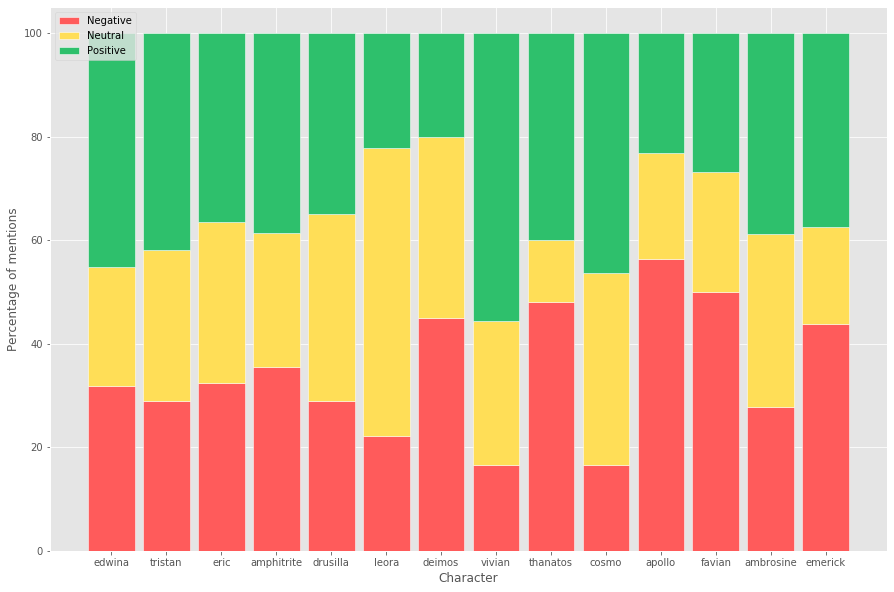

In [388]:
plot_percentages(['edwina', 'tristan', 'eric', 'amphitrite', 'drusilla', 'leora', 'deimos','vivian', 'thanatos', 'cosmo', 'apollo', 'favian', 'ambrosine', 'emerick'])

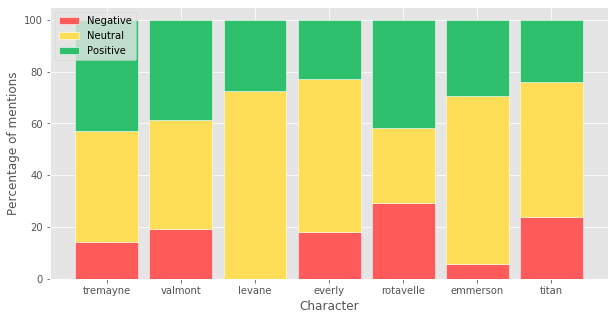

In [380]:
plot_percentages(['tremayne', 'valmont', 'levane', 'everly', 'rotavelle', 'emmerson', 'titan'])

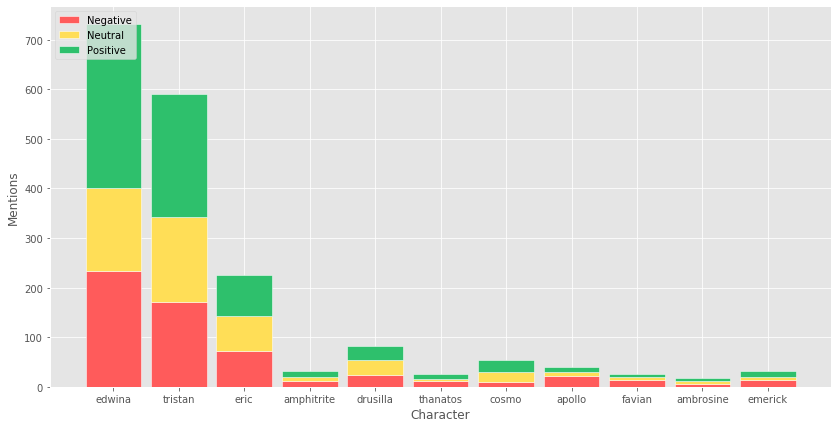

In [376]:
plot_scores(['edwina', 'tristan', 'eric', 'amphitrite', 'drusilla', 'thanatos', 'cosmo', 'apollo', 'favian', 'ambrosine', 'emerick'])